In [17]:
#Import scikit-learn dataset library
from sklearn import datasets
import numpy as np

In [18]:
#Load dataset
iris = datasets.load_iris()

# print the label species(setosa, versicolor,virginica)
print iris.target_names

['setosa' 'versicolor' 'virginica']


In [19]:
# print the names of the four features
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [27]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [28]:
target=pd.DataFrame(iris.target,columns=['target',])

In [29]:
finalDf = pd.concat([principalDf, target], axis = 1)

In [30]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


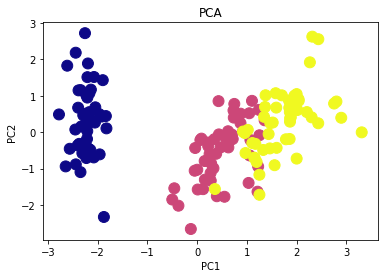

In [32]:
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf['target'], s=120, cmap='plasma')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [18]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [ ]:
pca = PCA(n_components=2)

pca.fit(df_scaled)

print(pca.explained_variance_ratio_) 

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

## PCA code from scratch

In [2]:
from scipy import linalg as la

In [3]:
x=[7,4,6,8,8,7,5,9,7,8]
y=[4,1,3,6,5,2,3,5,4,2]
z=[3,8,5,1,7,9,3,8,5,2]
X=zip(x,y,z)
X=np.array(X,dtype=float)

In [5]:
X.shape

(10L, 3L)

In [6]:
#X=iris.data
m,n=X.shape

# mean center the data
X -= X.mean(axis=0)

# calculate the covariance matrix
cov = np.cov(X, rowvar=False)

In [7]:
cov

array([[ 2.32222222,  1.61111111, -0.43333333],
       [ 1.61111111,  2.5       , -1.27777778],
       [-0.43333333, -1.27777778,  7.87777778]])

In [8]:
# calculate eigenvectors & eigenvalues of the covariance matrix
evals, evecs = la.eig(cov)

In [9]:
evals, evecs

(array([ 0.74992815+0.j,  3.67612927+0.j,  8.27394258+0.j]),
 array([[-0.70172743,  0.69903712, -0.1375708 ],
        [ 0.70745703,  0.66088917, -0.25045969],
        [ 0.08416157,  0.27307986,  0.95830278]]))

C:\Users\Avinash\Anaconda2\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


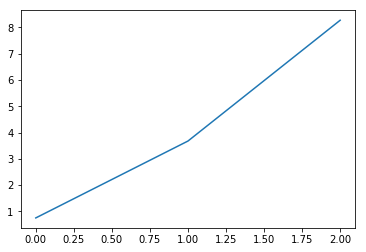

In [28]:
plt.plot(evals)
plt.show()

In [10]:
pc_count=2
key = np.argsort(evals)[::-1][:pc_count]
evals, evecs= evals[key], evecs[:, key]

In [11]:
evals, evecs

(array([ 8.27394258+0.j,  3.67612927+0.j]), array([[-0.1375708 ,  0.69903712],
        [-0.25045969,  0.66088917],
        [ 0.95830278,  0.27307986]]))

In [12]:
pc=np.dot(X,evecs)
pc

array([[-2.15142276, -0.17311941],
       [ 3.80418259, -2.88749898],
       [ 0.15321328, -0.98688598],
       [-4.7065185 ,  1.30153634],
       [ 1.29375788,  2.27912632],
       [ 4.0993133 ,  0.1435814 ],
       [-1.62582148, -2.23208282],
       [ 2.11448986,  3.2512433 ],
       [-0.2348172 ,  0.37304031],
       [-2.74637697, -1.06894049]])

In [128]:
pc=np.dot(evecs.T, X.T).T
pc

array([[-2.15142276, -0.17311941],
       [ 3.80418259, -2.88749898],
       [ 0.15321328, -0.98688598],
       [-4.7065185 ,  1.30153634],
       [ 1.29375788,  2.27912632],
       [ 4.0993133 ,  0.1435814 ],
       [-1.62582148, -2.23208282],
       [ 2.11448986,  3.2512433 ],
       [-0.2348172 ,  0.37304031],
       [-2.74637697, -1.06894049]])

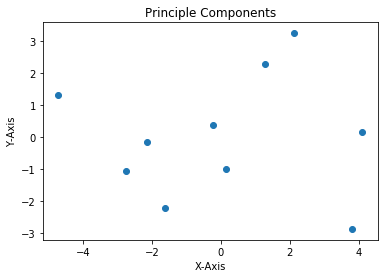

In [130]:
plt.scatter(pc[:,0], pc[:,1], cmap='plasma')
plt.title('Principle Components')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

## Finding Number of Components using Scree Plot

In [33]:
pca = PCA(n_components=4)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_) 

[ 0.72770452  0.23030523  0.03683832  0.00515193]


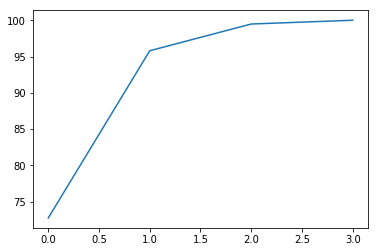

In [34]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

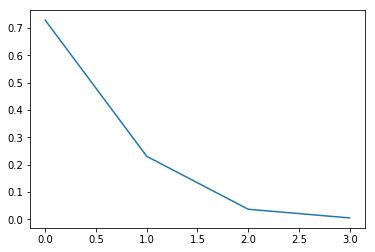

In [22]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [17]:
tot = sum(evals)
var_exp = [(i / tot)*100 for i in sorted(evals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

NameError: name 'evals' is not defined

In [29]:
pca.explained_variance_

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])